# Libraries Imported

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading .csv file

In [3]:
dataset = pd.read_csv('grid.csv')
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Constant Variables

In [4]:
#X = dataset.drop(['stab', 'stabf'], axis=1)
X = dataset.drop(['stab','stabf','p1','p2','p3','p4'], axis = 1)
y = dataset['stabf']

feature_names=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

# Pre-processing (Replacing String Values with Numerical)

In [5]:
dataset['stabf'].replace('unstable', 0, inplace = True)
dataset['stabf'].replace('stable', 1, inplace = True)
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


# Feature Scaling via Standardization

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Visualizing best value of  n_estimators (Accuracy Based)

Maximum accuracy:- 0.9471333333333334 at n_estimators = 36


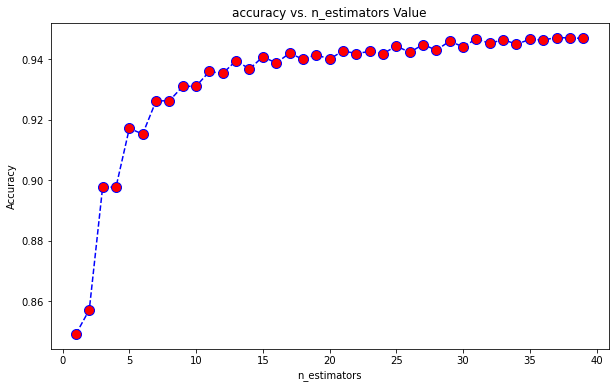

In [25]:
acc=[]
for i in range(1,40):
    clf = RandomForestClassifier(random_state = 42, n_estimators = i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at n_estimators =",acc.index(max(acc)))

# Visualizing best value of n_estimators (Precision Based)

Maximum Precision:- 0.9473074696004632 at n_estimators = 37


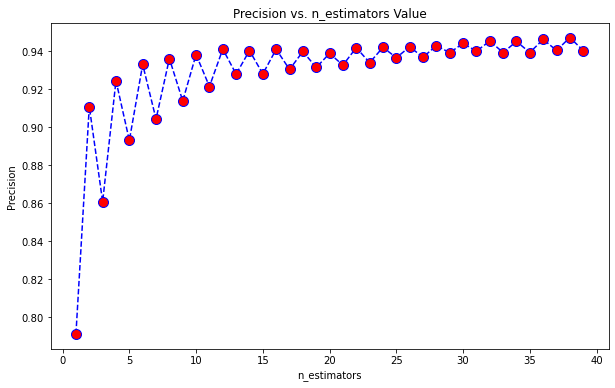

In [7]:
acc=[]
for i in range(1,40):
    clf = RandomForestClassifier(random_state = 42, n_estimators = i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.precision_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Precision vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Precision')
print("Maximum Precision:-", max(acc), "at n_estimators =", acc.index(max(acc)))

# Visualizing best value of n_estimators (Recall Based)

Maximum Recall:- 0.9116022099447514 at n_estimators = 36


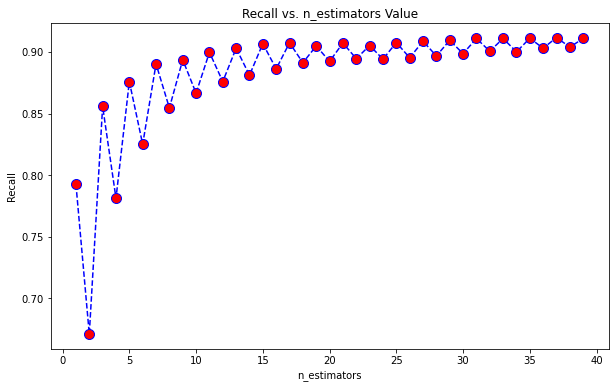

In [8]:
acc=[]
for i in range(1,40):
    clf = RandomForestClassifier(random_state = 42, n_estimators = i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.recall_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Recall vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Recall')
print("Maximum Recall:-", max(acc), "at n_estimators =",acc.index(max(acc)))

# Random Forest Classifier

Accuracy: 0.9500666666666666
Precision: 0.9460644177625309
Recall: 0.9141804788213628
F1-score: 0.929849208579189

Classification Report:

              precision    recall  f1-score       support
0              0.952220  0.970428  0.961238   9570.000000
1              0.946064  0.914180  0.929849   5430.000000
accuracy       0.950067  0.950067  0.950067      0.950067
macro avg      0.949142  0.942304  0.945544  15000.000000
weighted avg   0.949992  0.950067  0.949875  15000.000000


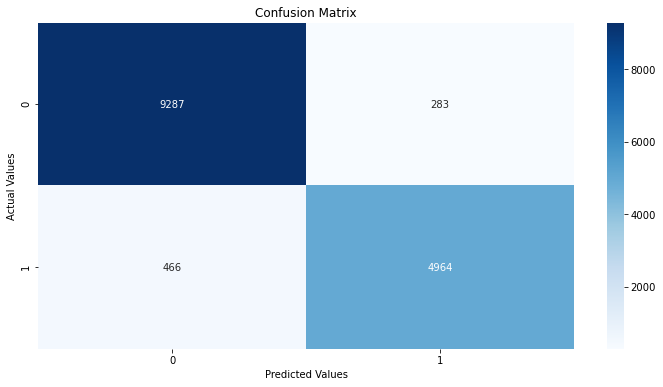

In [9]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))
print("")

print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

# Random Forest (GridSearchCV)

In [ ]:
clf = RandomForestClassifier(random_state=42)

param_grid = { 
    #'n_estimators': [10,20],
    'max_features': ['sqrt', 'log2'],
    #'max_depth' : [0, 3, 6],
    #'criterion' :['entropy', 'gini'], GINI
    # 'bootstrap':[True, False],
    # 'oob_score':[True, False],
    # 'verbose':[0,1,2],
    # 'warm_start': [True, False],
    # 'class_weight':['balanced', 'unbalanced', None],
    
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

# Random Forest Best Parameters

In [ ]:
CV_rfc.best_params_

# Random Forest Classifier w/ New Parameters

In [24]:
rfc = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=6,
                             criterion='gini')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

              precision    recall  f1-score     support
0              0.864428  0.954754  0.907349   9570.0000
1              0.902257  0.736096  0.810751   5430.0000
accuracy       0.875600  0.875600  0.875600      0.8756
macro avg      0.883342  0.845425  0.859050  15000.0000
weighted avg   0.878122  0.875600  0.872380  15000.0000
